In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 根据指定列读取csv文件
data = pd.read_csv('csv/DXYArea.csv')[[
    'cityName', 'city_confirmedCount', 'city_suspectedCount',
    'city_curedCount', 'city_deadCount', 'updateTime'
]]

data_copy = data.copy()

In [3]:
def get_data_by_cities(data, cities):
    # 删除非武汉的行
    data.drop(data[~data['cityName'].isin(cities)].index, inplace=True)

    # updateTime格式处理
    data['updateTime'] = data['updateTime'].map(lambda x: x[:10])

    data_cities = pd.DataFrame([])
    for city in cities:
        data_city = data.drop(data[data['cityName'] != city].index)

        data_city = data_city.groupby(['updateTime']).max()

        data_city['city_increase_confirmed'] = data_city[
            'city_confirmedCount'].diff(1).fillna(0)

        data_cities = data_cities.append(data_city)

    return data_cities

In [4]:
def show_bar_by_cities(data,cities,count_name):
    data_cities=get_data_by_cities(data,cities).pivot(columns='cityName').fillna(0)
    data_cities[count_name].plot(kind='bar',figsize=(15,5),width=0.8,rot=15)

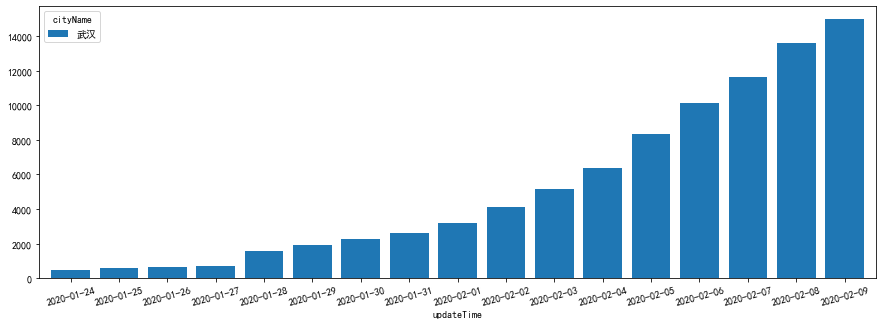

In [5]:
show_bar_by_cities(data.copy(),['武汉'],'city_confirmedCount')

# 轴旋转

In [6]:
data_cities = get_data_by_cities(data.copy(), ['黄石', '鄂州', '咸宁'])

In [7]:
data_cities.pivot(columns='cityName').fillna(0)

city_confirmedCount               city_suspectedCount            \
cityName                    咸宁     鄂州     黄石                  咸宁   鄂州   黄石   
updateTime                                                                   
2020-01-25                 0.0    1.0   31.0                 0.0  0.0  0.0   
2020-01-26                43.0    1.0   31.0                 0.0  0.0  0.0   
2020-01-27                64.0   20.0   36.0                 0.0  0.0  0.0   
2020-01-28                91.0   57.0   53.0                 0.0  0.0  0.0   
2020-01-29               112.0   84.0   86.0                 0.0  0.0  0.0   
2020-01-30               130.0  123.0  113.0                 0.0  0.0  0.0   
2020-01-31               166.0  189.0  168.0                 0.0  0.0  0.0   
2020-02-01               206.0  227.0  209.0                 0.0  0.0  0.0   
2020-02-02               246.0  278.0  252.0                 0.0  0.0  0.0   
2020-02-03               296.0  306.0  334.0                 0.0  0.0  0.0   
2020-02-04               348.0  332.0  405.0                 0.0  0.0  0.0   
2020-02-05               384.0  382.0  509.0                 0.0  0.0  0.0   
2020-02-06               399.0  423.0  566.0                 0.0  0.0  0.0   
2020-02-07               443.0  471.0  635.0                 0.0  0.0  0.0   
2020-02-08               476.0  569.0  703.0                 0.0  0.0  0.0   
2020-02-09               493.0  639.0  760.0                 0.0  0.0  0.0   

           city_curedCount             city_deadCount             \
cityName                咸宁    鄂州    黄石             咸宁    鄂州   黄石   
updateTime                                                         
2020-01-25             0.0   0.0   0.0            0.0   0.0  1.0   
2020-01-26             0.0   0.0   0.0            0.0   0.0  1.0   
2020-01-27             0.0   0.0   0.0            0.0   0.0  1.0   
2020-01-28             0.0   0.0   0.0            0.0   0.0  1.0   
2020-01-29             0.0   0.0   0.0            0.0   1.0  1.0   
2020-01-30             0.0   0.0   0.0            0.0   2.0  1.0   
2020-01-31             0.0   0.0   0.0            0.0   6.0  1.0   
2020-02-01             1.0   0.0   1.0            0.0   9.0  2.0   
2020-02-02             1.0   2.0   8.0            0.0  13.0  2.0   
2020-02-03             1.0   2.0   8.0            0.0  15.0  2.0   
2020-02-04             1.0   4.0   9.0            0.0  18.0  2.0   
2020-02-05             2.0   6.0  23.0            0.0  18.0  2.0   
2020-02-06             5.0   8.0  25.0            1.0  18.0  2.0   
2020-02-07             8.0   9.0  40.0            1.0  18.0  2.0   
2020-02-08            16.0  33.0  48.0            2.0  20.0  2.0   
2020-02-09            34.0  73.0  63.0            4.0  21.0  2.0   

           city_increase_confirmed               
cityName                        咸宁    鄂州     黄石  
updateTime                                       
2020-01-25                     0.0   0.0    0.0  
2020-01-26                     0.0   0.0    0.0  
2020-01-27                    21.0  19.0    5.0  
2020-01-28                    27.0  37.0   17.0  
2020-01-29                    21.0  27.0   33.0  
2020-01-30                    18.0  39.0   27.0  
2020-01-31                    36.0  66.0   55.0  
2020-02-01                    40.0  38.0   41.0  
2020-02-02                    40.0  51.0   43.0  
2020-02-03                    50.0  28.0   82.0  
2020-02-04                    52.0  26.0   71.0  
2020-02-05                    36.0  50.0  104.0  
2020-02-06                    15.0  41.0   57.0  
2020-02-07                    44.0  48.0   69.0  
2020-02-08                    33.0  98.0   68.0  
2020-02-09                    17.0  70.0   57.0

In [8]:
result = data_cities.pivot(columns='cityName')['city_confirmedCount']

In [9]:
result.columns

Index(['咸宁', '鄂州', '黄石'], dtype='object', name='cityName')

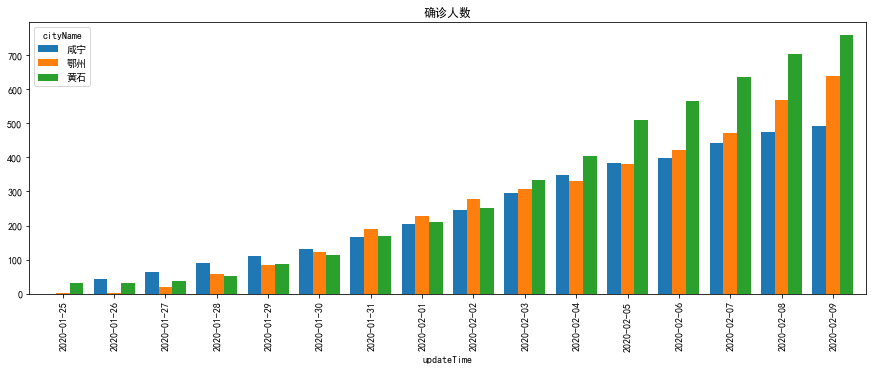

In [10]:
result.plot(kind='bar', figsize=(15, 5), title='确诊人数',width=0.8)

# 使用列重建索引

In [11]:
z = data_cities.reset_index()

In [12]:
z.sort_values(['updateTime', 'cityName']).set_index(['updateTime', 'cityName'])

city_confirmedCount  city_suspectedCount  \
updateTime cityName                                             
2020-01-25 鄂州                          1                    0   
           黄石                         31                    0   
2020-01-26 咸宁                         43                    0   
           鄂州                          1                    0   
           黄石                         31                    0   
2020-01-27 咸宁                         64                    0   
           鄂州                         20                    0   
           黄石                         36                    0   
2020-01-28 咸宁                         91                    0   
           鄂州                         57                    0   
           黄石                         53                    0   
2020-01-29 咸宁                        112                    0   
           鄂州                         84                    0   
           黄石                         86                    0   
2020-01-30 咸宁                        130                    0   
           鄂州                        123                    0   
           黄石                        113                    0   
2020-01-31 咸宁                        166                    0   
           鄂州                        189                    0   
           黄石                        168                    0   
2020-02-01 咸宁                        206                    0   
           鄂州                        227                    0   
           黄石                        209                    0   
2020-02-02 咸宁                        246                    0   
           鄂州                        278                    0   
           黄石                        252                    0   
2020-02-03 咸宁                        296                    0   
           鄂州                        306                    0   
           黄石                        334                    0   
2020-02-04 咸宁                        348                    0   
           鄂州                        332                    0   
           黄石                        405                    0   
2020-02-05 咸宁                        384                    0   
           鄂州                        382                    0   
           黄石                        509                    0   
2020-02-06 咸宁                        399                    0   
           鄂州                        423                    0   
           黄石                        566                    0   
2020-02-07 咸宁                        443                    0   
           鄂州                        471                    0   
           黄石                        635                    0   
2020-02-08 咸宁                        476                    0   
           鄂州                        569                    0   
           黄石                        703                    0   
2020-02-09 咸宁                        493                    0   
           鄂州                        639                    0   
           黄石                        760                    0   

                     city_curedCount  city_deadCount  city_increase_confirmed  
updateTime cityName                                                            
2020-01-25 鄂州                      0               0                      0.0  
           黄石                      0               1                      0.0  
2020-01-26 咸宁                      0               0                      0.0  
           鄂州                      0               0                      0.0  
           黄石                      0               1                      0.0  
2020-01-27 咸宁                      0               0                     21.0  
           鄂州                      0               0                     19.0  
           黄石                      0               1                      5.0  
2020-01-28 咸宁                      